In [32]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [33]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [34]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         horizontal_flip = True,
                                         zoom_range = 0.2)

val_datagen = image.ImageDataGenerator(rescale=1./255)

In [35]:
training_data = train_datagen.flow_from_directory('../data/covid-19/Train',
                                                  target_size=(224,224),
                                                  class_mode='binary',
                                                  batch_size=32)



Found 224 images belonging to 2 classes.


In [36]:
training_data.class_indices

{'Covid': 0, 'Normal': 1}

In [37]:
val_data = val_datagen.flow_from_directory('../data/covid-19/Val',target_size=(224,224),class_mode='binary',batch_size=32)

Found 60 images belonging to 2 classes.


In [38]:
import visualkeras
from PIL import ImageFont
from tensorflow.keras.utils import plot_model

In [39]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [40]:
font = ImageFont.truetype("arial.ttf", 32)

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [43]:

# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory('../data/covid-19/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

CLASSES = train_generator.class_indices
print(CLASSES)

validation_generator = test_dataset.flow_from_directory('../data/covid-19/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


hist = model.fit(
    train_generator,
    steps_per_epoch=7,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps=2
)

Found 224 images belonging to 2 classes.
{'Covid': 0, 'Normal': 1}
Found 60 images belonging to 2 classes.
Epoch 1/15
7/7 [==============================] - 53s 7s/step - loss: 0.7799 - accuracy: 0.6116 - val_loss: 0.6519 - val_accuracy: 0.9333
Epoch 2/15
7/7 [==============================] - 54s 8s/step - loss: 0.5223 - accuracy: 0.7723 - val_loss: 0.4549 - val_accuracy: 0.9500
Epoch 3/15
7/7 [==============================] - 51s 7s/step - loss: 0.3814 - accuracy: 0.8304 - val_loss: 0.3172 - val_accuracy: 0.9667
Epoch 4/15
7/7 [==============================] - 53s 8s/step - loss: 0.2413 - accuracy: 0.9196 - val_loss: 0.1893 - val_accuracy: 0.9833
Epoch 5/15
7/7 [==============================] - 55s 8s/step - loss: 0.1768 - accuracy: 0.9464 - val_loss: 0.0976 - val_accuracy: 0.9667
Epoch 6/15
7/7 [==============================] - 56s 8s/step - loss: 0.1593 - accuracy: 0.9554 - val_loss: 0.1176 - val_accuracy: 0.9833
Epoch 7/15
7/7 [==============================] - 53s 8s/step - l

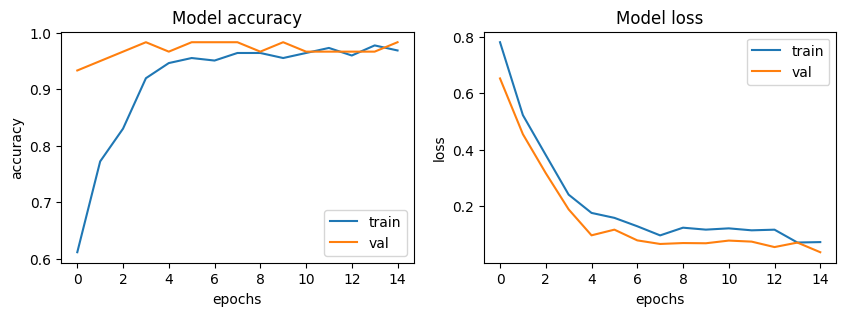

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
model.evaluate_generator(training_data)

[0.10905626912911733, 0.964539]

In [ ]:
model.evaluate_generator(val_data)

[0.18241364260514578, 0.9375]

1/1 [==============================] - 0s 109ms/step


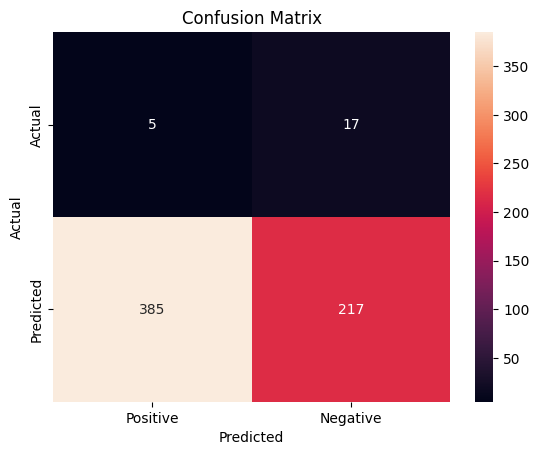

Accuracy: 0.36
Precision: 0.23
Recall: 0.01
F1 Score: 0.02


In [48]:
import cv2
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('../models/covid-19_model.h5')

TP = 0
TN = 0
FP = 0
FN = 0

threshold = 0.5

covid_images = os.listdir('../data/covid-19/Test/COVID')
normal_images = os.listdir('../data/covid-19/Test/NORMAL')

for i in covid_images:
    img = cv2.imread('../data/covid-19/Test/COVID/' + i)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    img = img / 255.0
    pred = model.predict(img)
    if pred < threshold:
        TP += 1
    else:
        FN += 1

for i in normal_images:
    img = cv2.imread('../data/covid-19/Test/NORMAL/' + i)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    img = img / 255.0
    pred = model.predict(img)
    if pred > threshold:
        TN += 1
    else:
        FP += 1

# Confusion Matrix
conf_matrix = [[TP, FP], [FN, TN]]

# Visualization
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=['Positive', 'Negative'],
            yticklabels=['Actual', 'Predicted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Additional metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

